In [1]:
TRAIN="chest_xray/train"
TEST="chest_xray/test"
VAL="chest_xray/val"
train_normal="chest_xray/train/NORMAL"
train_covid="chest_xray/train/PNEUMONIA"
test_normal="chest_xray/test/NORMAL"
test_covid="chest_xray/test/PNEUMONIA"

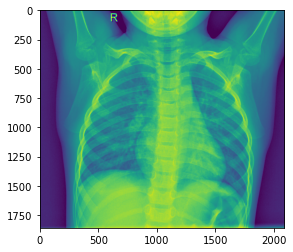

In [2]:
import matplotlib.pyplot as plt
im = plt.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg')
plt.imshow(im)
plt.show()

In [3]:
import os
import pandas as pd
filenames = os.listdir("chest_xray/train/NORMAL")
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'IM':
        categories.append(1)
    else:
        categories.append(0)

df1= pd.DataFrame({
    'filename': filenames,
    'category': categories
})
filenames = os.listdir("chest_xray/train/PNEUMONIA")
categories = []
for filename in filenames:
    category = filename.split('1')[0]
    if category == 'person':
        categories.append(0)
    else:
        categories.append(1)

df2= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "chest_xray/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "chest_xray/test",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_data.flow_from_directory(
        "chest_xray/val",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [16]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import optimizers
from keras import backend as K
from keras import regularizers
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)      

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "chest_xray/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "chest_xray/test",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

test_generator = test_data.flow_from_directory(
        "chest_xray/val",
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [17]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

In [8]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=500,  # 2000 images = batch_size * steps
     epochs=10,
     validation_data=validation_generator,
     validation_steps=62,  # 1000 images = batch_size * steps
     verbose=1)

Epoch 1/10
500/500 [==============================] - 273s 547ms/step - loss: 0.8985 - acc: 0.7432 - val_loss: 0.9772 - val_acc: 0.6258
Epoch 2/10
500/500 [==============================] - 283s 567ms/step - loss: 0.6891 - acc: 0.7810 - val_loss: 0.7221 - val_acc: 0.6742
Epoch 3/10
500/500 [==============================] - 264s 528ms/step - loss: 0.5346 - acc: 0.8327 - val_loss: 0.5921 - val_acc: 0.8210
Epoch 4/10
500/500 [==============================] - 248s 495ms/step - loss: 0.4513 - acc: 0.8519 - val_loss: 0.5603 - val_acc: 0.7839
Epoch 5/10
500/500 [==============================] - 203s 405ms/step - loss: 0.4002 - acc: 0.8663 - val_loss: 0.4583 - val_acc: 0.8806
Epoch 6/10
500/500 [==============================] - 179s 359ms/step - loss: 0.3358 - acc: 0.8817 - val_loss: 0.3658 - val_acc: 0.8806
Epoch 7/10
500/500 [==============================] - 185s 369ms/step - loss: 0.3050 - acc: 0.8861 - val_loss: 0.3237 - val_acc: 0.8935
Epoch 8/10
500/500 [============================

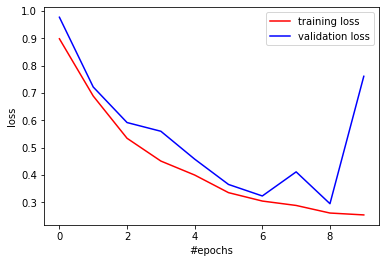

In [19]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('#epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

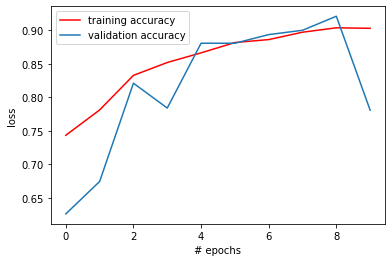

In [20]:
plt.plot(history.history['acc'],'r',label='training accuracy')
plt.plot(history.history['val_acc'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()